<a href="https://colab.research.google.com/github/desaimann37/Deep-Learning/blob/main/CatVSDog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats


 99% 1.05G/1.06G [00:07<00:00, 27.1MB/s]
100% 1.06G/1.06G [00:08<00:00, 142MB/s] 


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256 , 256)
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256 , 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize

def process(image , label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

In [16]:
# Create CNN Model :
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.1682 - accuracy: 0.6313 - val_loss: 0.6179 - val_accuracy: 0.6926
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5391 - accuracy: 0.7290 - val_loss: 0.5740 - val_accuracy: 0.6980
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4693 - accuracy: 0.7788 - val_loss: 0.4683 - val_accuracy: 0.7684
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4055 - accuracy: 0.8164 - val_loss: 0.4772 - val_accuracy: 0.7778
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3487 - accuracy: 0.8502 - val_loss: 0.4308 - val_accuracy: 0.8030
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2641 - accuracy: 0.8891 - val_loss: 0.5070 - val_accuracy: 0.7876
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1929 - accuracy: 0.9229 - val_loss: 0.5879 - val_ac

In [20]:
import cv2

import matplotlib.pyplot as plt

In [42]:
test_img = cv2.imread('/content/dog.jpg')


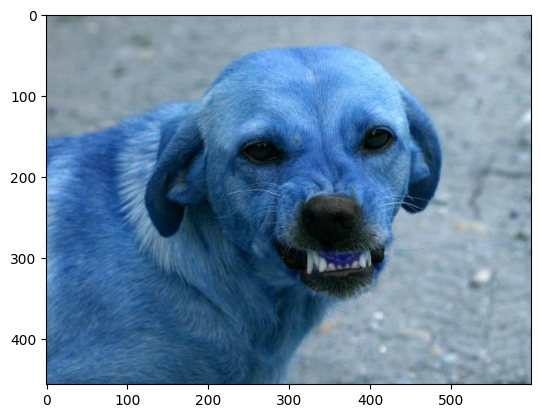

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(457, 600, 3)

In [45]:
test_img = cv2.resize(test_img, (256 ,256))

In [46]:
test_img.shape

(256, 256, 3)

In [47]:
test_input = test_img.reshape((1, 256, 256, 3))

In [48]:
predicted_class = model.predict(test_input)
if predicted_class == 1:
  print('Predicted Class is of Dog')
else :
  print('Predicted Class is of Cat')
# print(predicted_class)

1/1 [==============================] - 0s 27ms/step
Predicted Class is of Dog


(937, 1024, 3)
(256, 256, 3)
1/1 [==============================] - 0s 18ms/step
[[0.]]
Predicted Class is of Cat


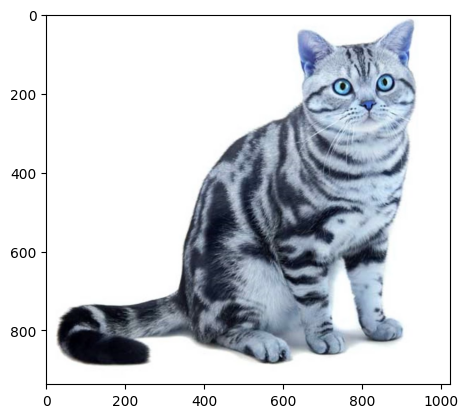

In [53]:
test_img2 = cv2.imread('/content/cat.jpg')
plt.imshow(test_img2)

print(test_img2.shape)
test_img2 = cv2.resize(test_img2, (256 ,256))
print(test_img2.shape)

test_input2 = test_img2.reshape((1, 256, 256, 3))

predicted_class2 = model.predict(test_input2)
print(predicted_class2)

if predicted_class2 == 1:
  print('Predicted Class is of Dog')
else :
  print('Predicted Class is of Cat')
